# ENTREGA PRÀCTICA 2 EQUACIONS DIFERENCIALS

## Víctor Ballester
## NIU: 1570866

In [1]:
reset()

Ens demanen fer un estudi de la despesa mínima (en electricitat) d'un habitatge on hi viuen dues persones. Aquestes dues persones compleixen: 
- Les dues se'n van a treballar (i.e. surten de casa) a les 8:00 del matí i tornen a les 14:00.
- De les 14:00 fins les 18:00 estan a casa.
- De les 18:00 a les 20:00 surten a passejar.
- De les 20:00 a les 08:00 (del dia següent) estan a casa.

Ens demanen minimitzar la despesa en calor que tindrà aquesta parella si requereixen que la temperatura de la casa oscil·li entre 18 i 22 graus quan ells es troben a casa.

## 1 - Cas sense tenir en compte les estacions

In [1]:
var("t a b")
T=function("T")(t)
T

T(t)

In [2]:
# Dades necessàries
Tmax=20 # Temperatura màxima exterior
Tmin=8 # Temperatura mínima exterior 
Tmax_casa=22 # Temperatura màxima interior desitjada
Tmin_casa=18 # Temperatura mínima interior desitjada
w=pi/12
k=0.1
T0=17
days=5
Temps=[8,14,18,20]
TOL=10^(-12) # Tolerància

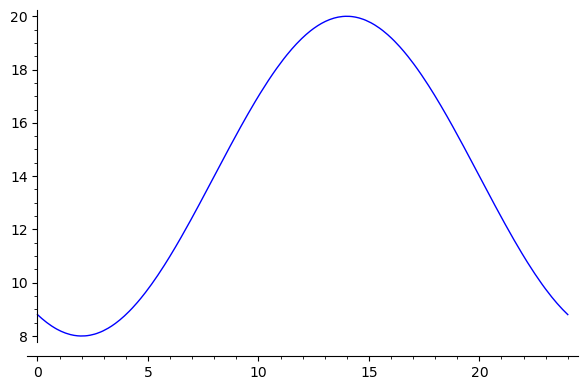

In [3]:
# funció que regula la temperatura exterior ajustada a les hores diàries.
Te=(Tmax+Tmin)/2+(Tmax-Tmin)/2*sin(w*(t-8))
plot(Te,0,24)

Com a equació per la calor $q(t)$ que emet la calefacció usarem la següent funció periòdica:

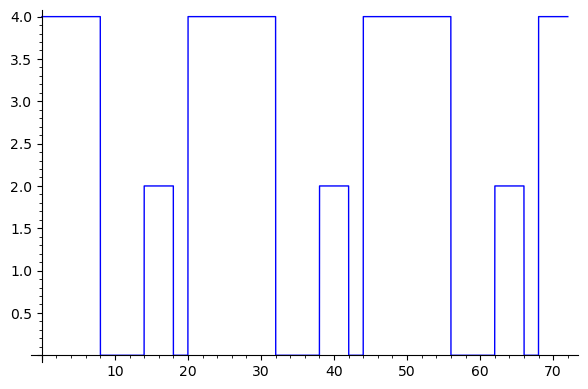

In [4]:
# NOTA: Amb el Sagemath no és gens fàcil definir funcions periòdiques amb les quals després puguis integrar, 
# diferenciar i resoldre edos (tot numèricament) de manera fàcil. Així que m'he decantat per aquesta altra opció.

f = unit_step(sin((t+4)*2*pi/24)-sin(0*2*pi/24))
g = unit_step(sin((t-10)*2*pi/24)-sin(4*2*pi/24))
q=a*f(t=t+TOL)+b*g(t=t+TOL) # utilitzem "t+TOL" encomptes de "t" per no tenir problemes d'aproximacions dels 
# nombres en punt flotant en els punts 8 + 24k, 14 + 24k, 18 + 24k i 20 + 24k, amb k enter.

# posem valors de prova per il·lustrar com es comporta la funció.
plot(q.subs(a=4,b=2),0,72) 

És a dir, la estufa emet una quantitat de calor $a$ durant el primer rang d'hores i una quantitat de calor $b$ durant el segon rang d'hores.

In [5]:
# Plantjem la edo
edo=diff(T,t)==q-k*(T-Te)

Provant diferents coeficients per a $a$ i $b$ trobem que $a=0.78$ i $b=0.51$ són adecuats.

In [6]:
# Solucionem la edo de forma numèrica i la grafiquem al llarg de "days" dies.
odesol=desolve_rk4(edo.subs(a=0.78,b=0.51),T,ics=[0,T0],ivar=t, step=0.1, end_points=days*24)
odesol

[[0, 17],
 [0.1, 16.99567276719878],
 [0.2, 16.99064287955095],
 [0.3, 16.98495353819696],
 [0.4, 16.97864800067588],
 [0.5, 16.97176955521476],
 [0.6000000000000001, 16.9643614949577],
 [0.7000000000000001, 16.95646709215288],
 [0.8, 16.94812957231543],
 [0.9, 16.93939208838437],
 [1.0, 16.93029769489163],
 [1.1, 16.92088932216134],
 [1.2, 16.91120975055728],
 [1.3, 16.90130158479659],
 [1.4, 16.89120722834778],
 [1.5, 16.88096885793082],
 [1.6, 16.8706283981372],
 [1.7, 16.86022749618771],
 [1.8, 16.84980749684559],
 [1.9, 16.83940941750256],
 [2.0, 16.82907392345521],
 [2.1, 16.81884130338893],
 [2.2, 16.80875144508662],
 [2.3, 16.79884381137913],
 [2.4, 16.78915741635417],
 [2.5, 16.77973080184046],
 [2.6, 16.77060201418342],
 [2.7, 16.76180858132869],
 [2.8, 16.75338749022956],
 [2.9, 16.74537516459404],
 [3.0, 16.73780744298706],
 [3.1, 16.73071955730333],
 [3.2, 16.72414611162571],
 [3.3, 16.71812106148391],
 [3.4, 16.71267769352821],
 [3.5, 16.70784860563216],
 [3.6, 16.7036656

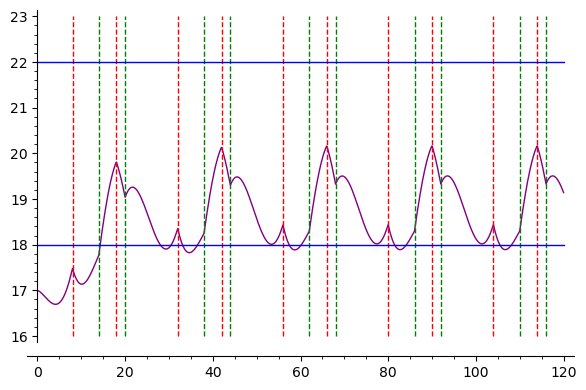

In [7]:
plot1=list_plot(odesol, plotjoined=True, color="purple")
plot2=sum(sum(line([(Temps[j]+24*d,Tmin_casa-2),(Temps[j]+24*d,Tmax_casa+1)],linestyle='--',color='green') for j in range(len(Temps)) if j % 2==1)+
          sum(line([(Temps[j]+24*d,Tmin_casa-2),(Temps[j]+24*d,Tmax_casa+1)],linestyle='--',color='red') for j in range(len(Temps)) if j % 2==0) for d in range(0,days))
plot3=plot(Tmax_casa,0,24*days)+plot(Tmin_casa,0,24*days)
plot1+plot2+plot3

Les línies blaves indiquen l'interval on ha d'estar la temperatura quan la parella és a casa.

Les línies discontínues verdes indiquen que la parella entra a casa en l'hora corresponent a l'absissa de la línia discontínua.

Les línies discontínues vermelles indiquen que la parella surt de casa en l'hora corresponent a l'absissa de la línia discontínua.

És a dir, la funció $T(t)$ s'ha de trobar entre les dues línes blaves en qualsevol interval de temps contingut en un interval de la forma [linia discontínua verda - línia discontínua vermella].

Cal mencionar que els dos primers dies no són significatius i que el problema s'estabilitza a partir del tercer. Observem de més aprop l'interval [08:00 del dia 3, 07:59 del dia 4].

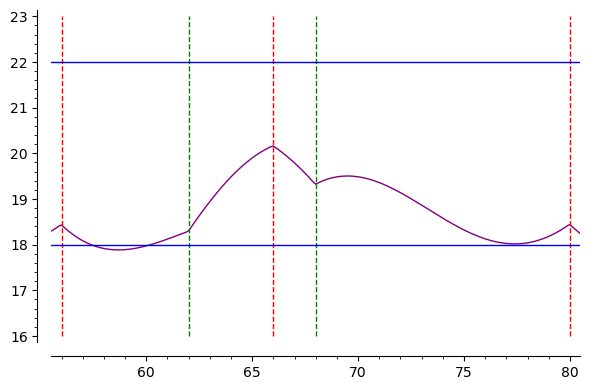

In [8]:
plot11=list_plot(odesol,xmin=56,xmax=80, plotjoined=True, color="purple")
plot11+plot2+plot3

I si encara ajustem més l'interval d'hores $(76,79)$...

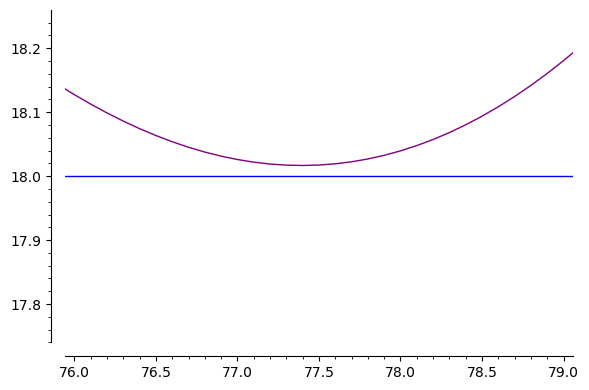

In [10]:
plot111=list_plot(odesol,xmin=76,xmax=79,ymin=17.75,ymax=18.25, plotjoined=True, color="purple")
plot111+plot3

...veiem que no sobrepassa el valor mínim. De tota manera, per a no haver d'estar mirant contínuament els gràfics de manera tan precisa, definim la següent funció:

In [9]:
# funció que detecta els valors de la funció que cauen fora d'un interval [y0,y1] (en el nostre cas serà [18,22])
# durant el rang d'hores estudiat, és a dir, [0,8], [14,18] o [20,24] i pels temps majors a "day_min" dies.
def valors_fora(f,y0,y1,day_min):
    S=[]
    for i in range(0,len(f)): # NOTA: RR(f[i][0]/24).frac()*24 és una manera de fer mòdul 24 en els nombres reals
        if ((RR(f[i][0]/24).frac()*24<8+TOL 
            or 14-TOL<RR(f[i][0]/24).frac()*24<18+TOL
            or 20-TOL<RR(f[i][0]/24).frac()*24) 
            and (f[i][1] < y0 or f[i][1] > y1)) and f[i][0]>day_min*24:
            S.append(f[i])
    return S

In [10]:
# En aquest cas faríem:
valors_fora(odesol,18,22,2) # day_min = 2 perquè despreciem els valors abans del tercer dia.

[]

És a dir, tots els valors que ens interessen a partir del dia 3 cauen dins l'interval $[18,22]$, com ja havíem vist gràficament.

Calculem ara la despesa energètica usant aquesta $q(t)$.

In [11]:
int_numerica=numerical_integral(q.subs(a=0.78,b=0.51),0,24)
preu1=int_numerica[0]
preu1 # De fet l'area de la gràfica es pot calcular directament ja que és una suma d'àreas de rectangles.

11.400000014005983

Suposem que una rebaixa $r$ del coeficient d'aïllament (és a dir, passem a una nova $k_\text{nova}= k-r$), té un cost de $\text{cost}(r)=6/(0.1-r)^2$ unitats. Entenem que arribar al aïllament total és impossible. Volem saber si surt a compte fer la inversió si la volem amortitzar en un any.

Aquesta parella, per això, decideix que si s'han de fer obres (és a dir, que surti més barat que el preu actual), es facin amb els millor materials possibles i independentment de quant menys paguin. Els paletes contesten que faran el que pugin però que només poden rebaixar el valor de $k$ de forma discreta en passos de 0.01 en 0.01 (per exemple, perquè només tenen a l'abast certs tipus de materials, i no infinits tipus de materials!).

In [26]:
var('r')
cost=6/(0.1-r)^2

In [12]:
# funció que calcula directament la solució de la edo amb la nova k (utilitzant la variable r) i amb valors de a i 
# b tals que a=A i b=B.
def inversio(A,B,r):
    k_nova=k-r
    edo_nova=diff(T,t)==q-k_nova*(T-Te)
    odesol=desolve_rk4(edo_nova.subs(a=A,b=B),T,ics=[0,T0],ivar=t, step=0.1, end_points=days*24)
    return odesol

Notem que ens interessa rebaixar més el coeffcient $a$ (que no pas el $b$) ja que contribueix més en el consum (veure gràfica de $q(t)$ més amunt).

Fem-ho per diferents valors de $r$.

#### $r=0.02:$

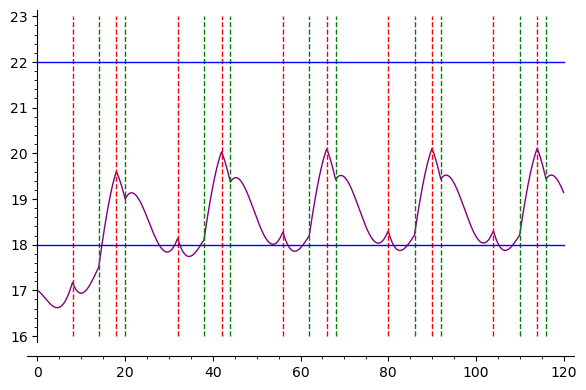

In [13]:
r2=[0.59,0.5] # triem aquests valors per a i b
r2_ode=inversio(r2[0],r2[1],0.02) # resolem l'edo i grafiquem la solució corresponent
r2_plot=list_plot(r2_ode, plotjoined=True, color="purple")
r2_plot+plot2+plot3

In [14]:
# comprovació que en els intervals d'hores que es troben a casa la temperatura estigui entre els límits desitjats
valors_fora(r2_ode,18,22,2)

[]

In [15]:
# calculem la despesa energètica
r2_int=numerical_integral(q.subs(a=r2[0],b=r2[1]),0,24,max_points=100)
r2_preu=r2_int[0]
r2.append(r2_preu)
r2[2] # r2_preu

9.080000013731357

#### $r=0.03:$

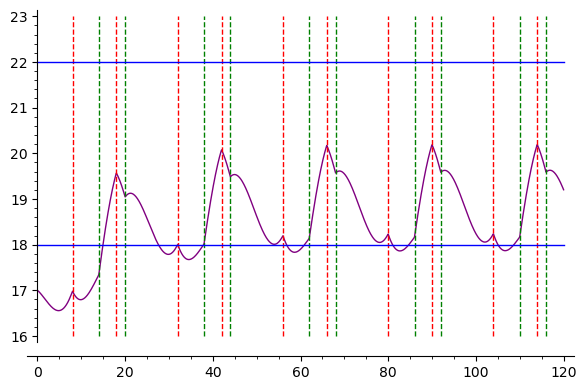

In [16]:
r3=[0.49,0.53] # triem aquests valors per a i b
r3_ode=inversio(r3[0],r3[1],0.03) # resolem l'edo i grafiquem la solució corresponent
r3_plot=list_plot(r3_ode, plotjoined=True, color="purple")
r3_plot+plot2+plot3

In [17]:
# comprovació que en els intervals d'hores que es troben a casa la temperatura estigui entre els límits desitjats
valors_fora(r3_ode,18,22,2)

[]

In [18]:
# calculem la despesa energètica
r3_int=numerical_integral(q.subs(a=r3[0],b=r3[1]),0,24,max_points=100)
r3_preu=r3_int[0]
r3.append(r3_preu)
r3[2] # r3_preu

8.000000014555239

#### $r=0.04:$

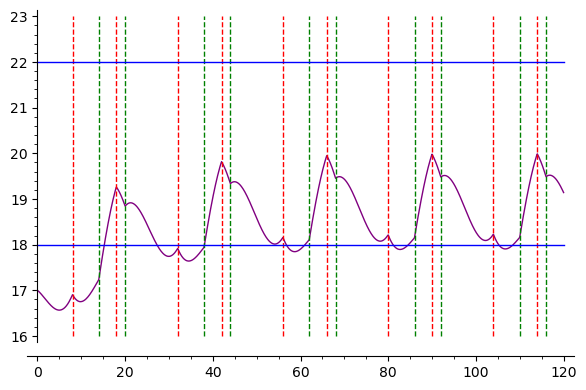

In [19]:
r4=[0.41,0.47] # triem aquests valors per a i b
r4_ode=inversio(r4[0],r4[1],0.04) # resolem l'edo i grafiquem la solució corresponent
r4_plot=list_plot(r4_ode, plotjoined=True, color="purple")
r4_plot+plot2+plot3

In [20]:
# comprovació que en els intervals d'hores que es troben a casa la temperatura estigui entre els límits desitjats
valors_fora(r4_ode,18,22,2)

[]

In [21]:
# calculem la despesa energètica
r4_int=numerical_integral(q.subs(a=r4[0],b=r4[1]),0,24,max_points=100)
r4_preu=r4_int[0]
r4.append(r4_preu)
r4[2] # r4_preu

6.800000012907474

#### $r=0.05:$

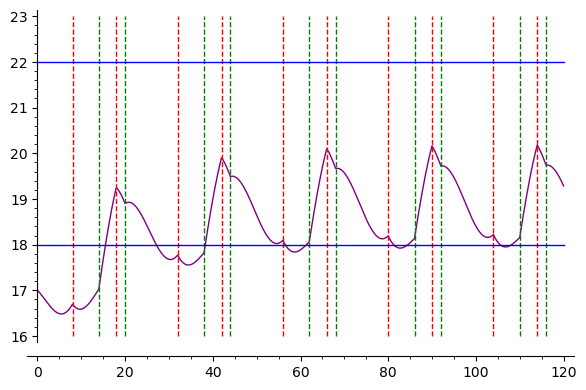

In [22]:
r5=[0.31,0.52] # triem aquests valors per a i b
r5_ode=inversio(r5[0],r5[1],0.05) # resolem l'edo i grafiquem la solució corresponent
r5_plot=list_plot(r5_ode, plotjoined=True, color="purple")
r5_plot+plot2+plot3

In [23]:
# comprovació que en els intervals d'hores que es troben a casa la temperatura estigui entre els límits desitjats
valors_fora(r5_ode,18,22,2)

[]

In [24]:
# calculem la despesa energètica
r5_int=numerical_integral(q.subs(a=r5[0],b=r5[1]),0,24,max_points=100)
r5_preu=r5_int[0]
r5.append(r5_preu)
r5[2] # r5_preu

5.799999992859695

In [27]:
R=[r2,r3,r4,r5]
print("Factura anual:\n\nPreu sense fer obres:\t\t",preu1*365.25)
for i in range(0,len(R)):
    preu_totali=R[i][2]*365.25+cost(1/100*(i+2)) # preu diari*365.24 + cost d'inversió
    print("Preu amb obres (r =",(1/100*(i+2)).n(digits=2),"\b):\t",preu_totali)

Factura anual:

Preu sense fer obres:		 4163.85000511569
Preu amb obres (r = 0.020 ):	 4253.97000501538
Preu amb obres (r = 0.030 ):	 4146.48980123467
Preu amb obres (r = 0.040 ):	 4150.36667138112
Preu amb obres (r = 0.050 ):	 4518.44999739200


Per tant, només tenen dues possibilitats. Agafar el material amb $k_\text{nova}=0.1-0.03$ o el material amb $k_\text{nova}=0.1-0.04$. Encara que aquest últim surti un pèl més car, la parella l'escollirà perquè és de millor qualitat i surt més barat que el preu que estaven pagant actualment (que era la condició que imposaven).

Observació: és clar que els coeficients $a$ i $b$ triats per a cada cas ($r=0.02$, $r=0.03$, $r=0.04$ i $r=0.05$) no són òptims en el sentit que no minimitzen completament el cost total (al haver-se fet l'estudi numèricament, caldria bastanta potència de computació per determinar el mínim de la funció de manera discreta). No obstant això, donen una bona aproximació dels resultats.

## 2 - Cas tenint en compte les estacions (temperatura anual)

Casualment una component de la parella és matemàtic i ràpidament se n'adona que en el càlcul del pressupost que han fet els paletes no han tingut en compte les estacions de l'any, i en conseqüència, la variació de temperatura que suposen. Així doncs el matemàtic es proposa calcular un preu més real del pressupost anual amb les $k_\text{nova}$ que d'entrada sortia més barat, és a dir, amb $k_\text{nova}=0.1-0.03$ i $k_\text{nova}=0.1-0.04$.

In [28]:
Tmax_any=35 # temperatura mitjana (en un dia) màxima anual
Tmin_any=10 # temperatura mitjana (en un dia) mínima anual
W=pi/6
hores_anuals=365.25*24

Suposarem que la temeperatura mínima s'assoleix entre el mes de gener i febrer.

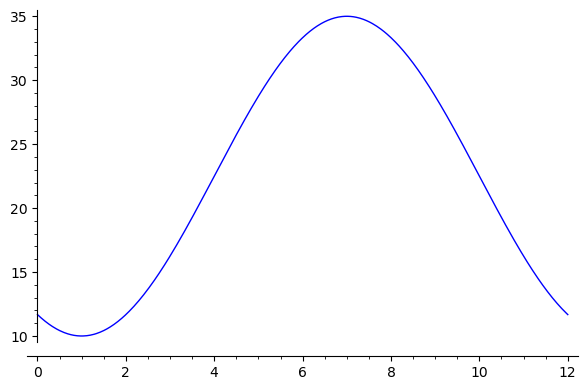

In [29]:
# funció que regula la temperatura exterior ajustada als mesos anuals.
Te_any=(Tmax_any+Tmin_any)/2+(Tmax_any-Tmin_any)/2*sin(W*(t+8))
plot(Te_any,0,12)

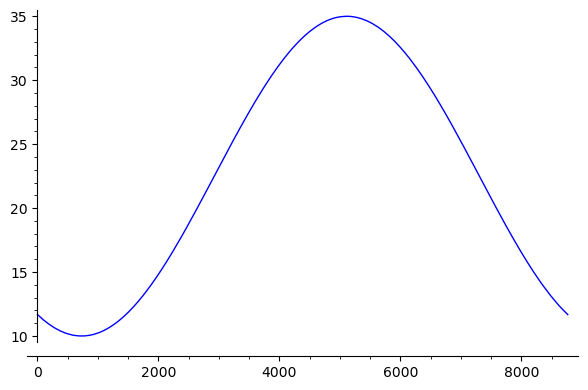

In [30]:
# gràfic de la temperatura en funció de les hores de l'any.
Te_any2=Te_any(t/(hores_anuals/12))
plot(Te_any2,0,hores_anuals)

In [31]:
# temperatura exterior total (incloent les variacions del dia i la nit)
Te_total=Te_any2+Te-(Tmax+Tmin)/2
Te_total

25/2*sin(4/3*pi + 0.000228154232261008*pi*t) + 6*sin(-2/3*pi + 1/12*pi*t) + 45/2

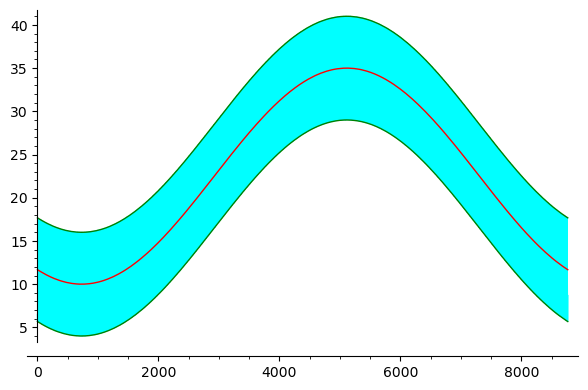

In [33]:
p1=plot(Te_total,0,hores_anuals,plot_points=1000,color='aqua')
p2=plot(Te_any2,0,hores_anuals,color='red')
p3=plot(Te_any2+(Tmax-Tmin)/2,0,hores_anuals,color='green')
p4=plot(Te_any2-(Tmax-Tmin)/2,0,hores_anuals,color='green')
p1+p2+p3+p4

En blau cel es representa la funció de temperatura exterior definitiva.

En vermell, la funció de temperatura mitjana al llarg de l'any.

En verd, les funcions que acoten la funció de temperatura exterior. 

Si ampliem una mica...

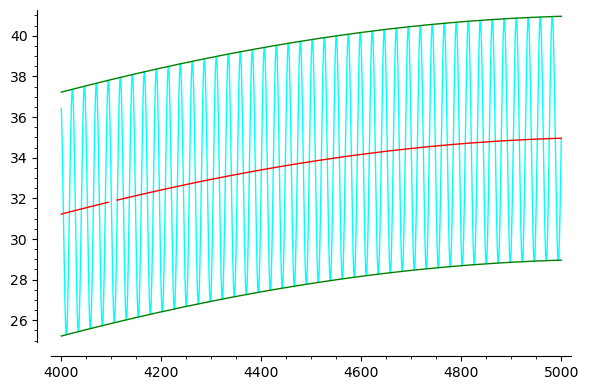

In [34]:
p11=plot(Te_total,4000,5000,plot_points=1000,color='aqua')
p22=plot(Te_any2,4000,5000,color='red')
p33=plot(Te_any2+(Tmax-Tmin)/2,4000,5000,color='green')
p44=plot(Te_any2-(Tmax-Tmin)/2,4000,5000,color='green')
p11+p22+p33+p44

Solucionem ara el problema agafant com a funció de temperatura exterior aquesta.

##### Càlcul de la nit més freda

In [37]:
# funció per calcular tots els mínims locals

def nit_mes_freda(a,b):
    S=[]
    for i in srange(a,b,24):
        S.append(find_local_minimum(Te_total,i,i+24)) # funció que retorna una parella (m,n) on m és el mínim 
        # local que pren la funció en l'interval [a,b] i n és el valor on s'assoleix aquest mínim
    return S

In [38]:
S=nit_mes_freda(0,hores_anuals)
S

[(5.665709704057036, 2.0108663065913985),
 (5.56007136392077, 26.010539939161436),
 (5.457670287191117, 50.0102103834511),
 (5.358536774746057, 74.00987780652831),
 (5.262700160567476, 98.00954230675245),
 (5.17018880306221, 122.00920398350844),
 (5.081030076671766, 146.00886293681214),
 (4.995250363773113, 170.00851926766956),
 (4.912875046873076, 194.0081730776133),
 (4.8339285010985265, 218.00782446922423),
 (4.758434086984629, 242.00747354566894),
 (4.686414143563301, 266.0071202684187),
 (4.617889981753933, 290.00676462950304),
 (4.552881878058173, 314.0064069883065),
 (4.491409068560877, 338.0060474505441),
 (4.433489743238869, 362.00568612249225),
 (4.379141040579206, 386.0053231109569),
 (4.328379042508523, 410.00495852324235),
 (4.281218769635011, 434.0045924671193),
 (4.237674176804379, 458.0042250507931),
 (4.197758148970724, 482.00386353707734),
 (4.161482497385357, 506.0034940825105),
 (4.128857956101815, 530.003123594643),
 (4.099894178799769, 554.0027521830967),
 (4.0745

In [39]:
nit_freda=min(S)
nit_freda

(4.000231988550247, 722.0001356967776)

In [40]:
dia=nit_freda[1]/24+1
mes=nit_freda[1]/(24*(365.25/12))+1
print("La nit més freda serà la del dia",floor(dia),"del mes",floor(mes),"i farà",nit_freda[0],"graus. A més s'assolirà a les", floor(nit_freda[1]-(floor(dia)-1)*24),"\b:00 de la matinada.")

La nit més freda serà la del dia 31 del mes 1 i farà 4.000231988550247 graus. A més s'assolirà a les 2 :00 de la matinada.


##### Definició de la nova funció de calor

In [41]:
T0_anual=10 # nova condició inicial (agafant l'anterior T0=17 no hagués estat coherent el problema).

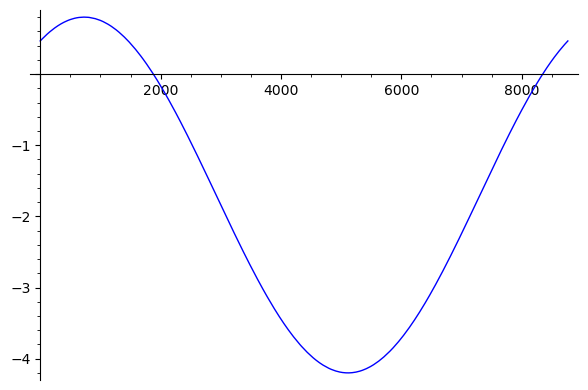

In [42]:
var('c d')
# quan faci més fred, haurem d'aportar més calor i quan faci menys fred, menys calor. Per tant, és natural pensar
# que la calor introduïda al llarg de l'any es comporta de forma similar a "Te_any2", però oposada en fase.
q=(c*(Te_any2(t-hores_anuals/2)-(Tmax_any+Tmax_any)/2)-d)
plot(q.subs(c=0.2,d=-0.8),0,hores_anuals) # posem valors de prova per il·lustrar com es comporta la funció.

Notem que aportar calor negativa signifca que s'engega un aire acondicionat (en comptes de la calefacció) per escalfar negativament (i.e. refredar) la casa. En qualsevol cas, per més tard calcular la despesa total, ens interessarà el valor absolut de la calor introduïda.

De forma similar al cas 1, no cal mantenir la maquinària (calefacció o aire acondicionat) oberta mentre no hi ha ningú a casa. És per això que farem la següent modifacació per tal de reduïr gastos.

Recordem que la parella és a casa en els intervals [20-8] (idenitficat com a "a", en la notació a continuació) i [14-18] (idenitficat com a "b", en la notació a continuació).

In [43]:
escalfament_previ_a=1 # nombre d'hores d'antel·lació que hem d'engegar els aparells abans que la parella arribi 
# a casa en l'interval "a"
escalfament_previ_b=2.25 # nombre d'hores d'antel·lació que hem d'engegar els aparells abans que la parella 
# arribi a casa en l'interval "b"
f = unit_step(sin((t+4+escalfament_previ_a/2)*2*pi/24)-sin((0-escalfament_previ_a/2)*2*pi/24)) # definició anàloga 
# al cas anterior (el cas sense considerar les estacions) però amb la incorporació de "escalfament_previ_a"
g = unit_step(sin((t-10+escalfament_previ_b/2)*2*pi/24)-sin((4-escalfament_previ_b/2)*2*pi/24)) # definició anàloga
# al cas anterior (el cas sense considerar les estacions) però amb la incorporació de "escalfament_previ_b"

In [44]:
minim=find_local_minimum(Te_any2,0,hores_anuals) # minim local de la funció Te_any2 en l'interval [0,hores_anuals]
minim

(10.0, 730.4999936828382)

In [45]:
z=(hores_anuals/4-minim[1]) # punt on s'assoleix el maxim de la funció sin(2*pi*t/hores_anuals))
z

1461.000006317162

In [46]:
# En el cas anterior, hem utilitzat coeficients "a" i "b" constants que multiplicaven a les funcions f i g. En 
# aquest cas, degut a la gran variació de temperatura entre estiu i hivern, hem decidit fer servir coeficients 
# variants en el temps entre un màxim (a1 i b1, respectivament) i un mínim (a2 i b2, respectivament).
var('a1 a2 b1 b2')
L=(((a1+a2)/2+(a1-a2)/2*sin(2*pi*(t+z)/hores_anuals))*f(t=t+TOL)+
   ((b1+b2)/2+(b1-b2)/2*sin(2*pi*(t+z)/hores_anuals))*g(t=t+TOL))

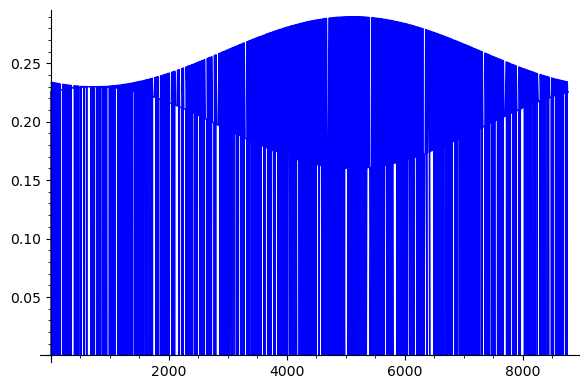

In [47]:
plot(L.subs(a1=0.23,a2=0.16,b1=0.23,b2=0.29),0,hores_anuals,plot_points=1000) # posem valors de prova per 
# il·lustrar com es comporta la funció.

Si ampliem una mica...

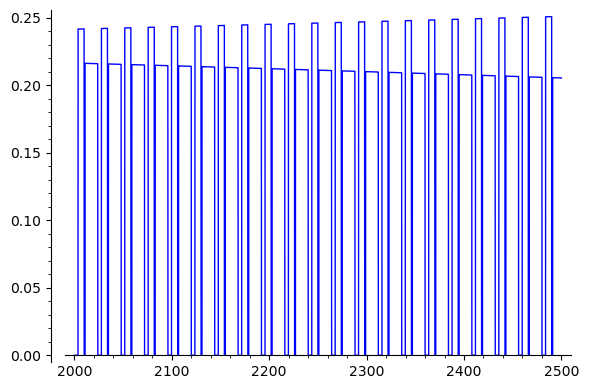

In [48]:
plot(L.subs(a1=0.23,a2=0.16,b1=0.23,b2=0.29),2000,2500,plot_points=1000)

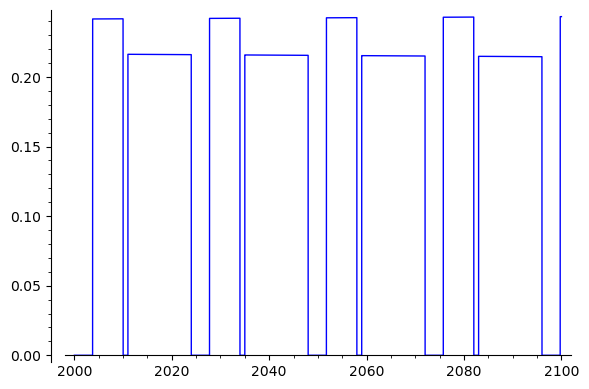

In [49]:
plot(L.subs(a1=0.23,a2=0.16,b1=0.23,b2=0.29),2000,2100,plot_points=1000)

Finalment, la funció de calor triada és:

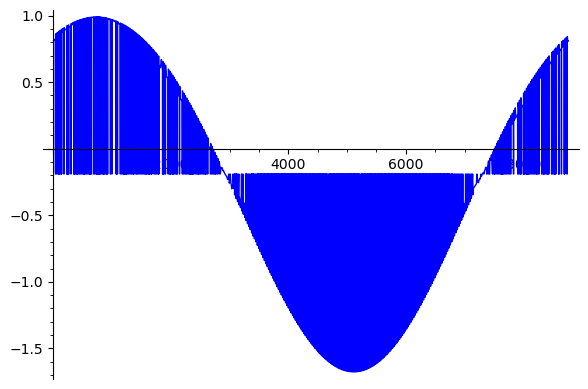

In [50]:
Q=c*(Te_any2(t-hores_anuals/2)-(Tmax_any+Tmin_any)/2)*L-d
plot(Q.subs(a1=0.23,a2=0.16,b1=0.23,b2=0.29,c=0.41,d=0.19),0,hores_anuals,plot_points=1000) # posem valors de 
# prova per il·lustrar com es comporta la funció.

Si ampliem una mica...

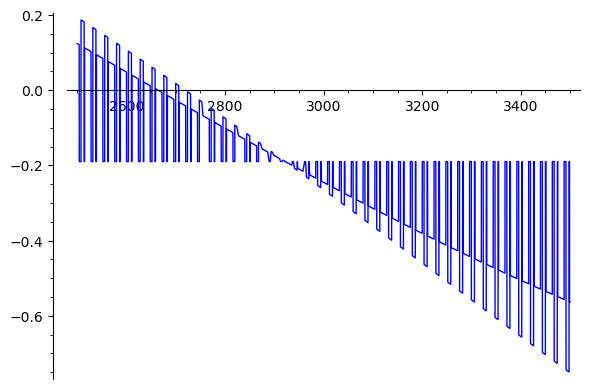

In [51]:
plot(Q.subs(a1=0.23,a2=0.16,b1=0.23,b2=0.29,c=0.41,d=0.19),2500,3500,plot_points=500)

In [53]:
# funció que resol l'equació diferencial

def ode_sol_anual(days,r,A1,A2,B1,B2,C,D):
    edo=diff(T,t)==Q.subs(a1=A1,a2=A2,b1=B1,b2=B2,c=C,d=D)-(k-r)*(T-Te_total)
    odesol_anual=desolve_rk4(edo,T,ics=[0,T0_anual],ivar=t, step=1, end_points=[0,24*days])
    return odesol_anual

#### $r=0.03:$

Provant diferents coeficients trobem que $a_1=0.23$, $a_2=0.16$, $b_1=0.23$, $b_2=0.29$, $c=0.41$, $d=0.19$ són adecuats.

In [54]:
odesol3=ode_sol_anual(366,
                      0.03, # r
                      0.23, # a1 - hivern
                      0.16, # a2 - estiu
                      0.23, # b1 - hivern
                      0.29, # b2 - estiu
                      0.41, # control de la convexitat
                      0.19) # control de l'altura del gràfic

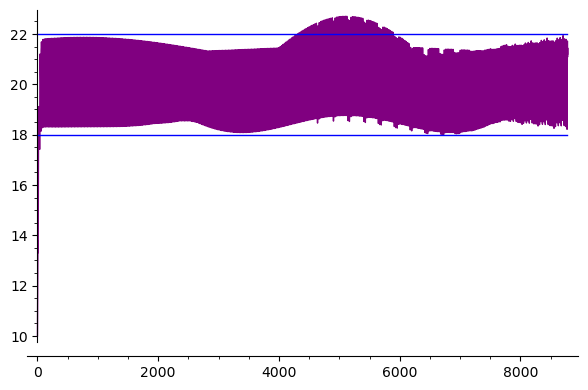

In [55]:
days=366
plot1_anual=list_plot(odesol3, plotjoined=True, color="purple")
plot3_anual=plot(Tmax_casa,0,24*365.25)+plot(Tmin_casa,0,24*365.25)
plot1_anual+plot3_anual

Sembla que a l'estiu hi hagi massa calor acumulada! Observem què passa de més aprop.

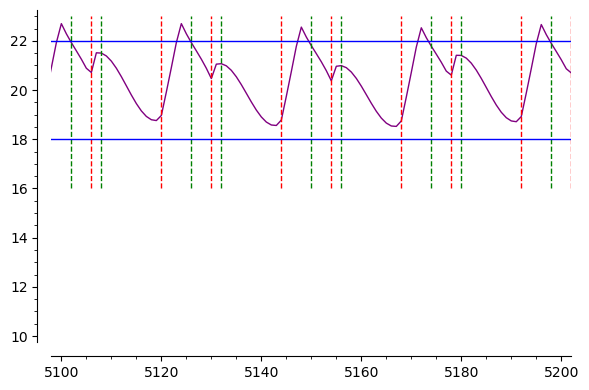

In [56]:
days=366
plot1_anual=list_plot(odesol3,xmin=5100,xmax=5200, plotjoined=True, color="purple")
plot2_anual=sum(sum(line([(Temps[j]+24*d,Tmin_casa-2),(Temps[j]+24*d,Tmax_casa+1)],linestyle='--',color='green') for j in range(len(Temps)) if j % 2==1)+
          sum(line([(Temps[j]+24*d,Tmin_casa-2),(Temps[j]+24*d,Tmax_casa+1)],linestyle='--',color='red') for j in range(len(Temps)) if j % 2==0) for d in range(0,days))
plot3_anual=plot(Tmax_casa,0,24*365.25)+plot(Tmin_casa,0,24*365.25)

plot1_anual+plot2_anual+plot3_anual

Notem que a les hores que es troben a casa la temperatura és la desitjada. Per comprovar-ho més precisament, executem la següent instrucció (com en el cas 1):

In [57]:
# comprovació que en els intervals d'hores que es troben a casa la temperatura estigui entre els límits desitjats
valors_fora(odesol3,18,22,2)

[]

#### $r=0.04:$

Provant diferents coeficients trobem que $a_1=0.23$, $a_2=0.16$, $b_1=0.23$, $b_2=0.35$, $c=0.33$, $d=0.15$ són adecuats.

In [58]:
odesol4=ode_sol_anual(366,
                      0.04, # r
                      0.23, # a1 - hivern
                      0.16, # a2 - estiu
                      0.23, # b1 - hivern
                      0.35, # b2 - estiu
                      0.33, # control de la convexitat
                      0.15) # control de l'altura del gràfic

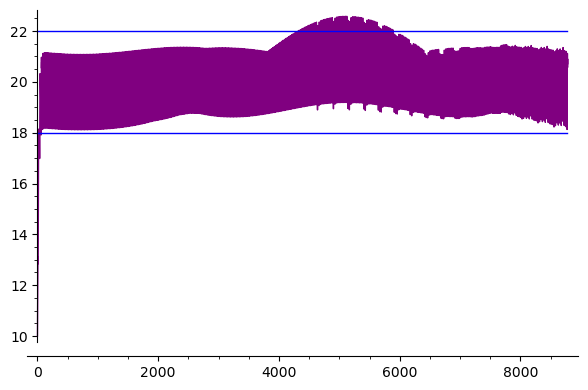

In [59]:
days=366
plot1_anual=list_plot(odesol4, plotjoined=True, color="purple")
plot1_anual+plot3_anual

In [60]:
# comprovació que en els intervals d'hores que es troben a casa la temperatura estigui entre els límits desitjats
valors_fora(odesol4,18,22,2)

[]

##### Càlcul del pressupost anual

In [61]:
# funcions de calor utilitzades:
Q3=Q.subs(a1=0.23,a2=0.16,b1=0.23,b2=0.29,c=0.41,d=0.19) # r = 0.03
Q4=Q.subs(a1=0.23,a2=0.16,b1=0.23,b2=0.35,c=0.33,d=0.15) # r = 0.04

Com hem mencionat anteriorment per calcular el pressupost integrem el valor absolut de la funció calor.

In [62]:
preu_total3=numerical_integral(abs(Q3),0,hores_anuals)[0]
preu_total4=numerical_integral(abs(Q4),0,hores_anuals)[0]

In [63]:
print(preu_total3, preu_total4)

5220.072778973034 4352.102425073509


In [64]:
print("Factura anual:\n")
print("Preu amb obres (r = 0.03):\t",preu_total3+cost(0.03))
print("Preu amb obres (r = 0.04):\t",preu_total4+cost(0.04))

Factura anual:

Preu amb obres (r = 0.03):	 6444.56257489140
Preu amb obres (r = 0.04):	 6018.76909174018


Observació: és clar que els coeficients triats en ambdós casos ($r=0.03$ i $r=0.04$) no són òptims en el sentit que no minimitzen el cost total (al haver-se fet l'estudi numèricament, caldria bastanta potència de computació per determinar el mínim de la funció de manera discreta). No obstant això, donen una bona aproximació dels resultats.